<a href="https://colab.research.google.com/github/beaasuncion/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [351]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


## B. Load and understand the dataset

In [352]:
dataframe = pd.read_excel("personality.xlsx")
dataframe

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Kamira,1,1,1,487,1
1,Ronaldo,1,1,1,154,1
2,Elizer,0,1,0,1000,0
3,Renz,1,1,1,370,1
4,Brix,1,1,1,297,1
...,...,...,...,...,...,...
64,Mary,0,1,0,1324,0
65,Mary,0,1,1,1120,0
66,Mary,0,1,0,1324,0
67,Mary,0,1,1,924,0


1. Display the summary of all the features of the dataset using `.info()`

In [353]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         69 non-null     object
 1   Post/Share Frequently?       69 non-null     int64 
 2   Active in social media?      69 non-null     int64 
 3   Replies to comments?         69 non-null     int64 
 4   Number of friends/followers  69 non-null     int64 
 5   Personality                  69 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.4+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [354]:
dataframe["Personality"].value_counts()

,count
Personality,
0,44
1,25


In [355]:
dataframe.drop(columns='Name', inplace=True)

## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [356]:
X = dataframe.drop(columns=['Personality']).values

dataframe.drop(columns='name', inplace=True)
X = df.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [357]:
y = dataframe['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [358]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41, 4)
(41,)
(28, 4)
(28,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [359]:
knn = KNeighborsClassifier(n_neighbors=13)

7. Train the model using the `.fit()`

In [360]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

8. Test the model using the `.predict()`

In [361]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

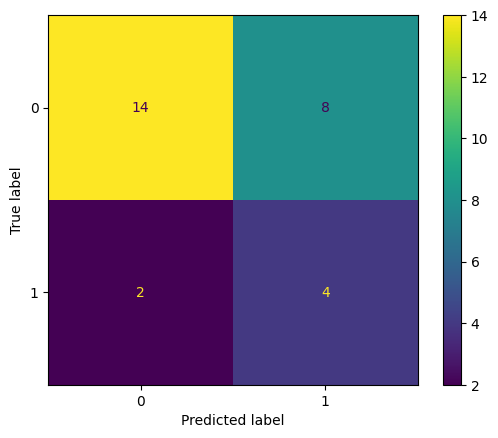

In [362]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [363]:
metrics.accuracy_score(y_test, y_pred)

0.6428571428571429

11. Display the precision

In [364]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.63636364 0.66666667]


12. Display the recall

In [365]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.875      0.33333333]


13. Display the f1-score

In [366]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.73684211 0.44444444]


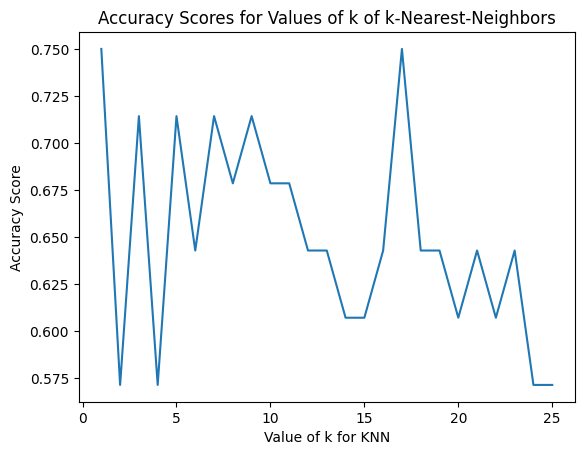

In [367]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [368]:
knn.predict([[0,1,0,1000]])

array([0])